In [1]:
import geopandas as gpd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import os
import rioxarray

from levee_hunter.utils import find_splits
from levee_hunter.get_mask import get_mask
from levee_hunter.segmentation_dataset import SegmentationDataset
from levee_hunter.plots import plot_img_and_target

In [2]:
# Importing the Lidar data (.tif files)
data_dir = "../data/raw/w3-Lidar"
tif_files = [file for file in os.listdir(data_dir) if file.endswith(".tif")]
images = [
    rioxarray.open_rasterio(os.path.join(data_dir, file)) for file in tif_files[:]
]

print(len(tif_files))
tif_files[0:5]

3


['USGS_1_n39w122_20240313.tif',
 'USGS_13_n39w122_20240313.tif',
 'USGS_one_meter_x63y422_CA_Sacramento_2017.tif']

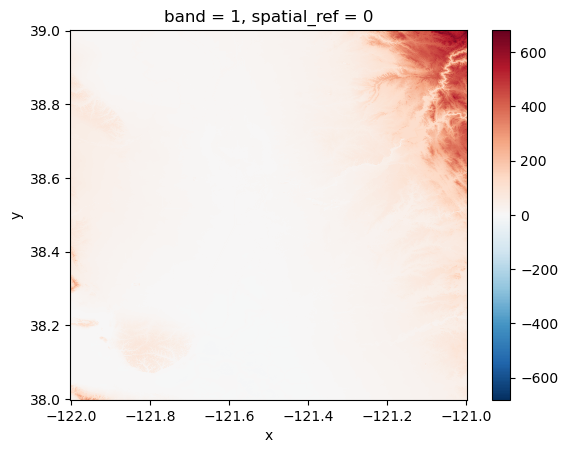

In [3]:
img_1 = images[0]
img_1.plot()

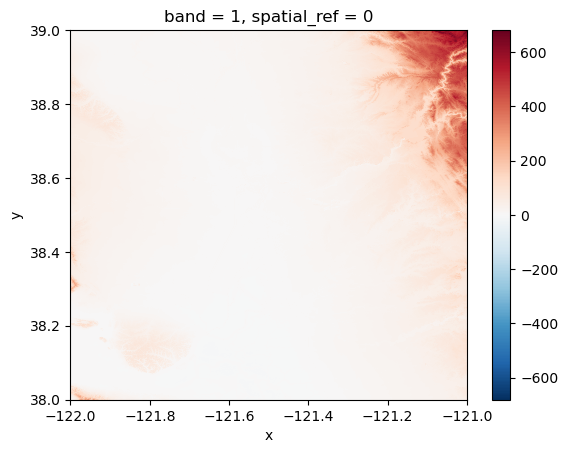

In [4]:
img_13 = images[1]
img_13.plot()

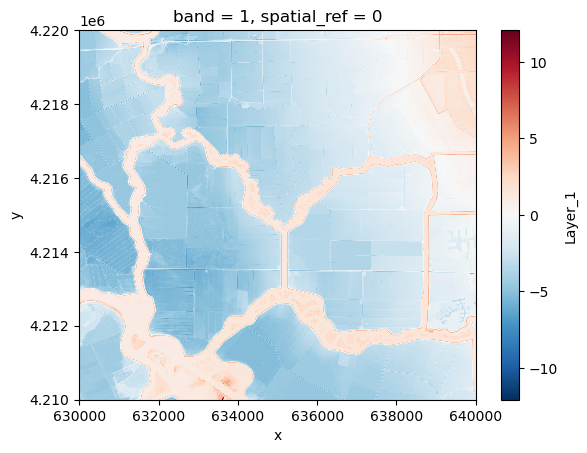

In [5]:
img_1m = images[2]
img_1m.plot()

In [6]:
print(img_1.rio.crs, img_13.rio.crs, img_1m.rio.crs)

EPSG:4269 EPSG:4269 EPSG:26910


In [7]:
img_1.shape, img_13.shape, img_1m.shape

((1, 3612, 3612), (1, 10812, 10812), (1, 10012, 10012))

In [8]:
# Load the levees data
levees_file = "../data/raw/w1-Kickoff/us_levees_n38w122.gpkg"
levees_data = gpd.read_file(levees_file)
levees_data_4269 = levees_data.to_crs("EPSG:4269")
levees_data_26910 = levees_data.to_crs("EPSG:26910")

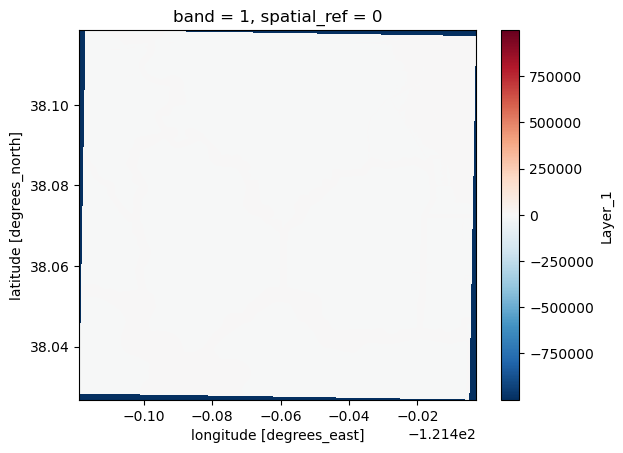

In [9]:
# This is the reprojection issue that I have been having
# That is why I preferred to reproject levees to the
# same crs as the images, not the other way around
img_1m_4269 = img_1m.rio.reproject("EPSG:4269")
img_1m_4269.plot()

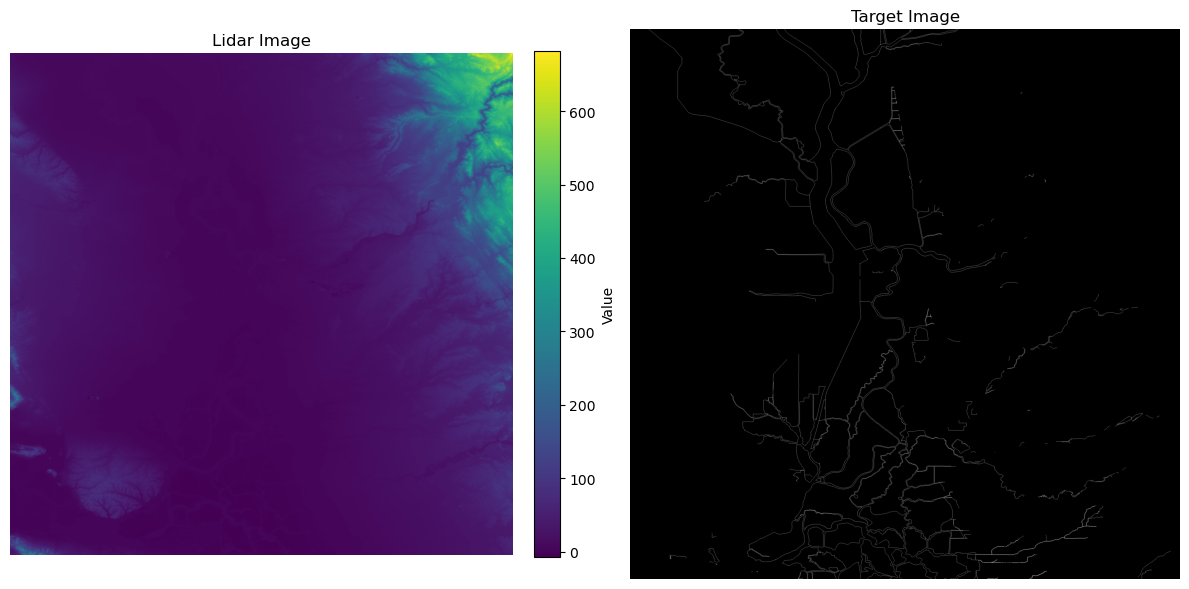

In [10]:
img_1_arr, img_1_target = get_mask(
    img_1, levees_data_4269, invert=True, dilation_size=1
)

plot_img_and_target(img_1_arr, img_1_target)

In [11]:
img_1_target = img_1_target.reshape(1, 3612, 3612)
img_1_arr.shape, img_1_target.shape

((1, 3612, 3612), (1, 3612, 3612))

In [12]:
find_splits(Z=3612, s=512, max_overlap_frac=0.1)[:10]

[(7, 0, 3584),
 (7, 1, 3578),
 (7, 2, 3572),
 (7, 3, 3566),
 (7, 4, 3560),
 (7, 5, 3554),
 (7, 6, 3548),
 (7, 7, 3542),
 (7, 8, 3536),
 (7, 9, 3530)]

In [13]:
img_1_dataset_512 = SegmentationDataset(
    img_1_arr[:, :3548, :3548],
    img_1_target[:, :3548, :3548],
    transform=None,
    split=True,
    patch_size=512,
    final_size=512,
    overlap=6,
)

len(img_1_dataset_512)

49

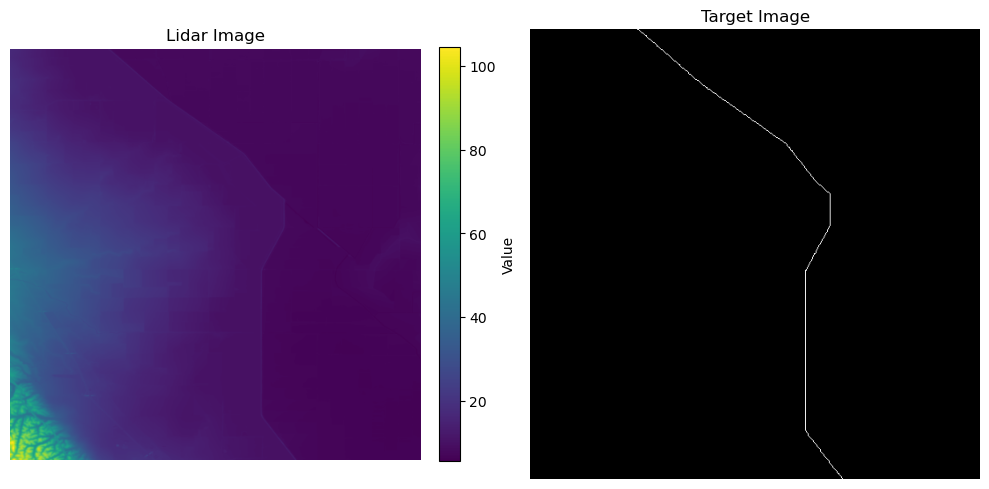

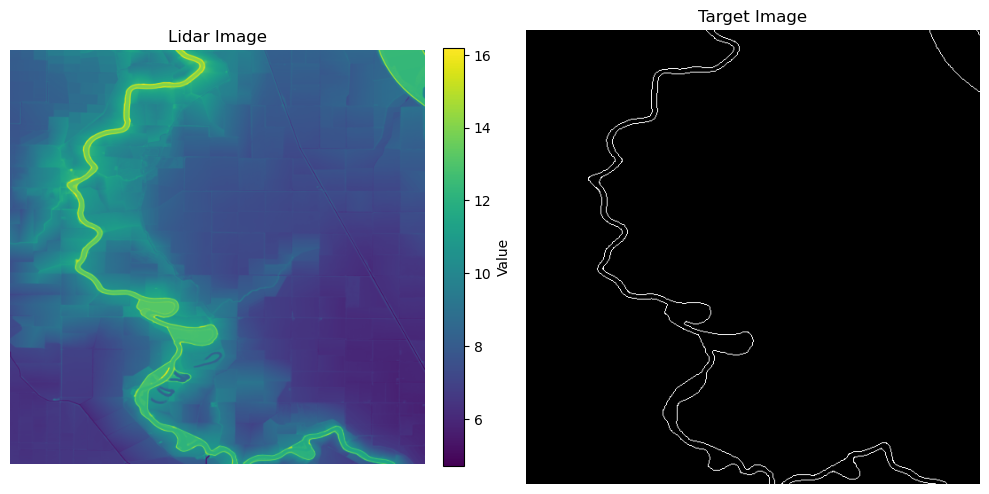

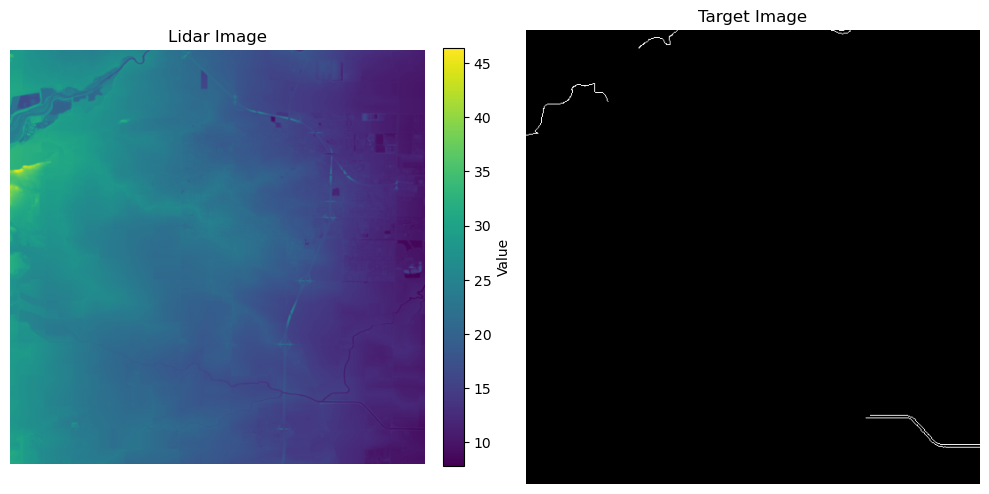

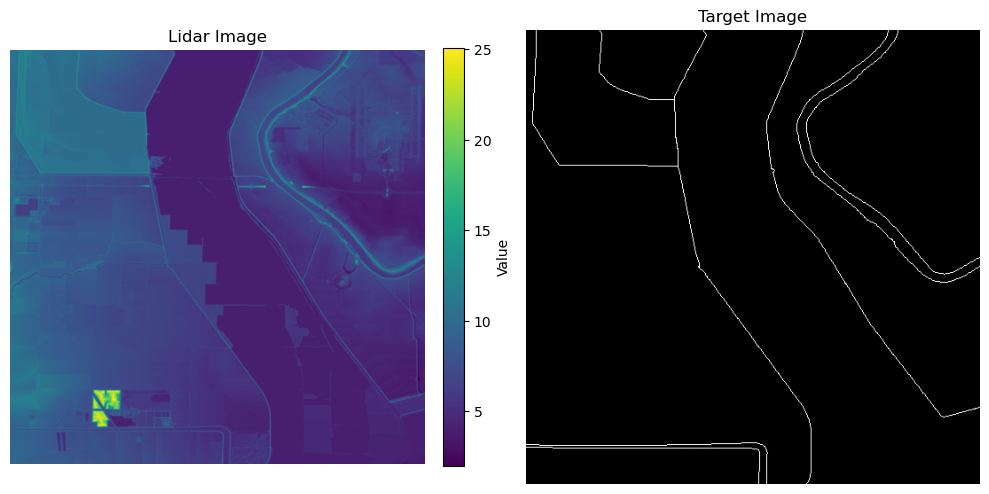

In [14]:
img_1_dataset_512.plot(0, figsize=(10, 10))
img_1_dataset_512.plot(1, figsize=(10, 10))
img_1_dataset_512.plot(15, figsize=(10, 10))
img_1_dataset_512.plot(16, figsize=(10, 10))

In [15]:
find_splits(Z=3612, s=256, max_overlap_frac=0.1)[:10]

[(15, 17, 3602),
 (15, 18, 3588),
 (14, 0, 3584),
 (15, 19, 3574),
 (14, 1, 3571),
 (15, 20, 3560),
 (14, 2, 3558),
 (15, 21, 3546),
 (14, 3, 3545),
 (14, 4, 3532)]

In [16]:
img_1_dataset_256 = SegmentationDataset(
    img_1_arr[:, :3602, :3602],
    img_1_target[:, :3602, :3602],
    transform=None,
    split=True,
    patch_size=256,
    final_size=256,
    overlap=17,
)

len(img_1_dataset_256)

225

In [17]:
img_1_dataset_256.remove_empty(keep_empty=0.1)

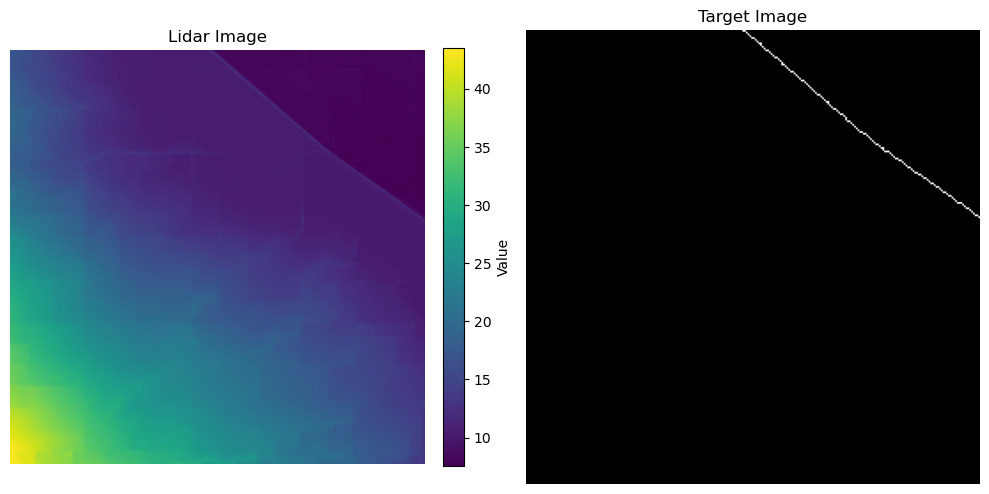

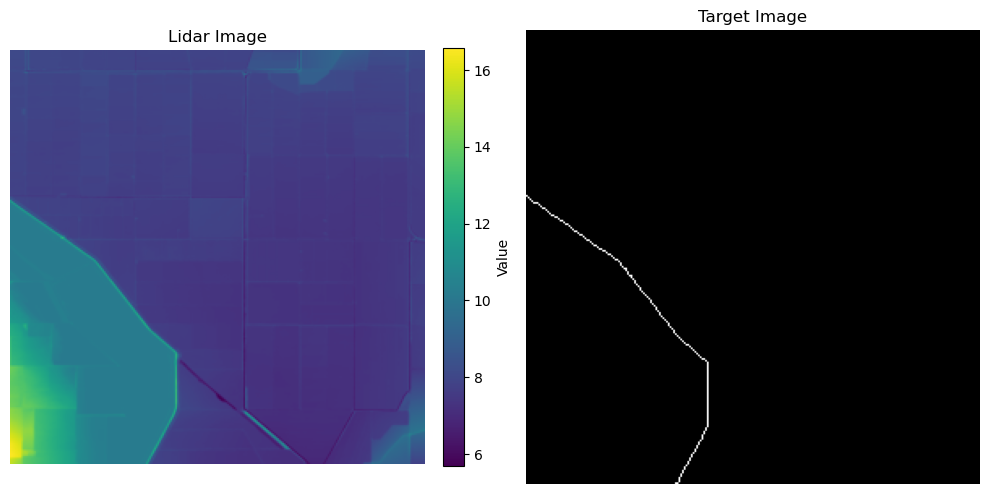

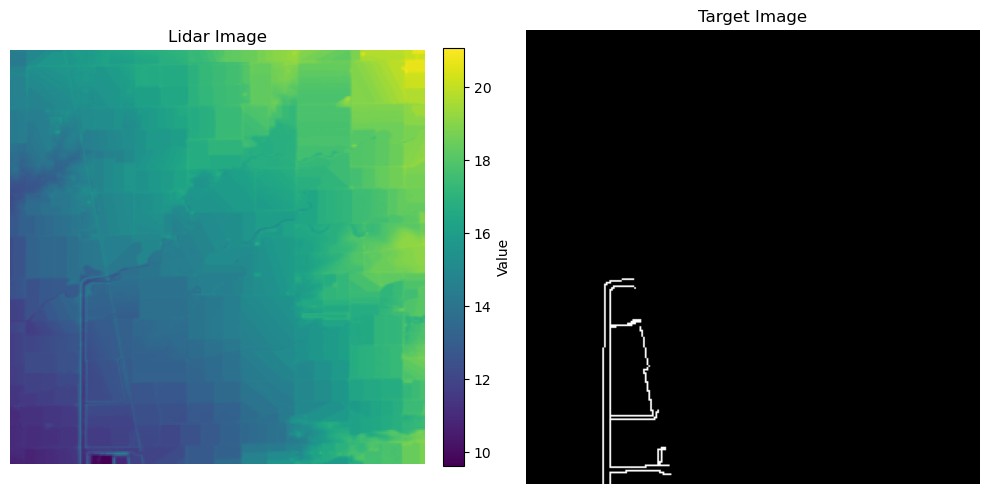

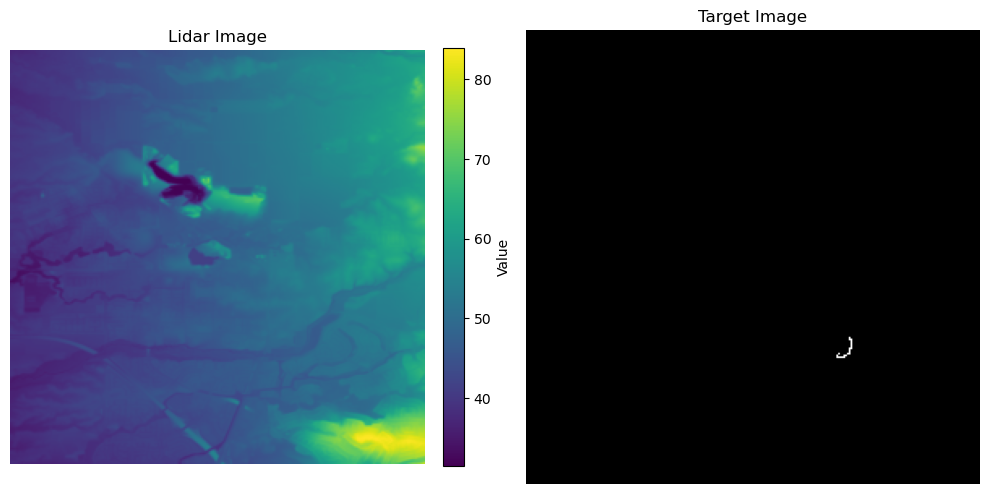

In [18]:
img_1_dataset_256.plot(0, figsize=(10, 10))
img_1_dataset_256.plot(1, figsize=(10, 10))
img_1_dataset_256.plot(15, figsize=(10, 10))
img_1_dataset_256.plot(16, figsize=(10, 10))

# 1/3 Arcsec

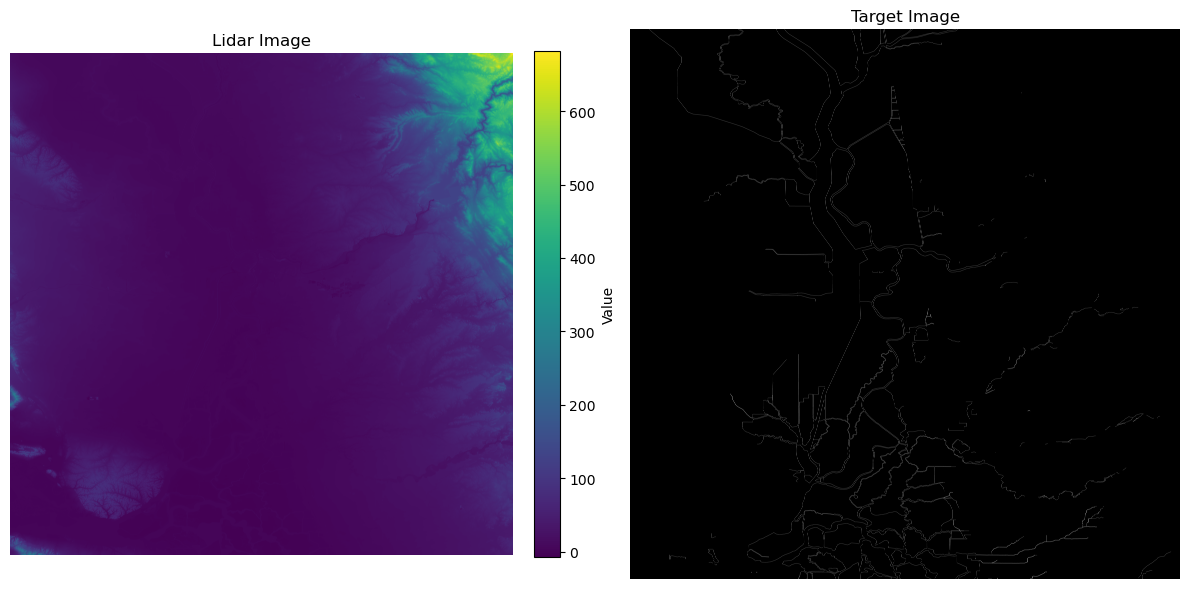

In [19]:
img_13_arr, img_13_target = get_mask(
    img_13, levees_data_4269, invert=True, dilation_size=2
)

plot_img_and_target(img_13_arr, img_13_target)

In [20]:
img_13_target = img_13_target.reshape(1, 10812, 10812)
img_13_arr.shape, img_13_target.shape

((1, 10812, 10812), (1, 10812, 10812))

In [21]:
find_splits(Z=10812, s=512, max_overlap_frac=0.1)[:10]

[(23, 44, 10808),
 (22, 22, 10802),
 (23, 45, 10786),
 (22, 23, 10781),
 (23, 46, 10764),
 (22, 24, 10760),
 (21, 0, 10752),
 (23, 47, 10742),
 (22, 25, 10739),
 (21, 1, 10732)]

In [22]:
img_13_dataset_512 = SegmentationDataset(
    img_13_arr[:, :10802, :10802],
    img_13_target[:, :10802, :10802],
    transform=None,
    split=True,
    patch_size=512,
    final_size=512,
    overlap=22,
)

len(img_13_dataset_512)

484

In [23]:
img_13_dataset_512.remove_empty(keep_empty=0.1)

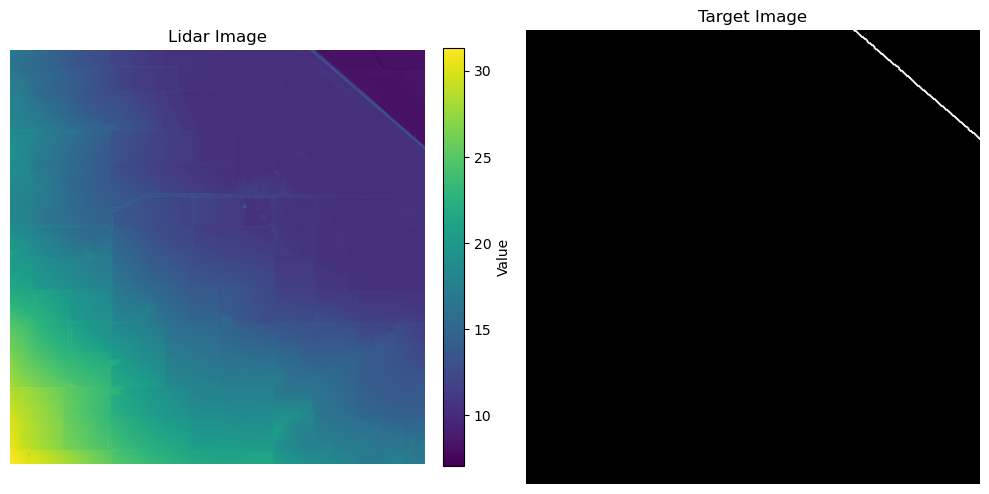

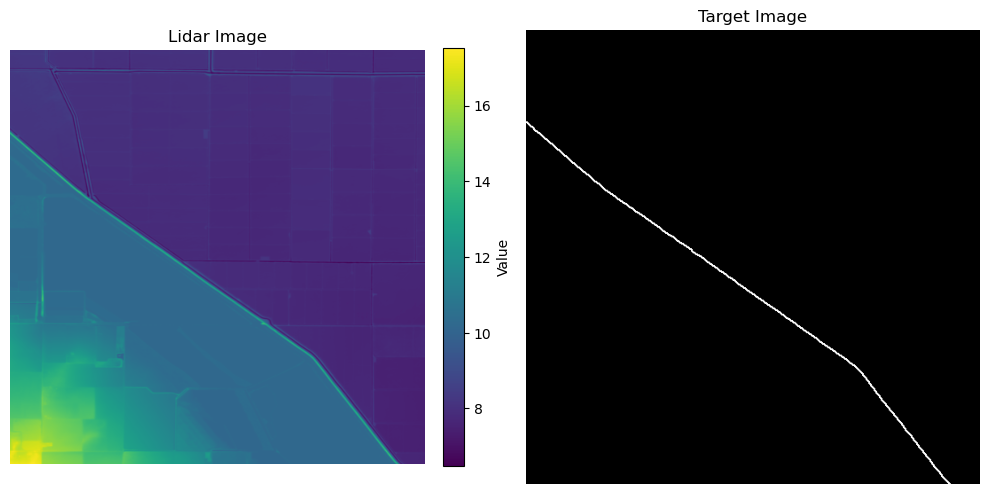

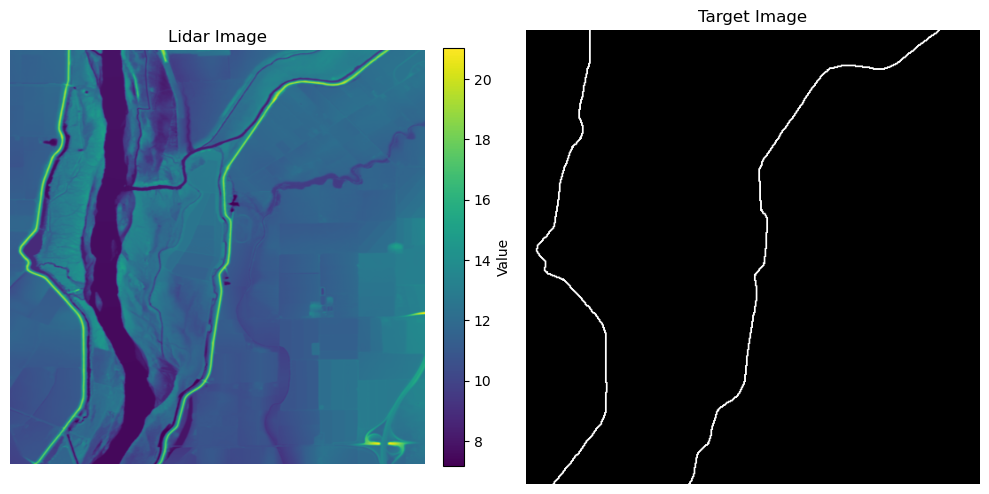

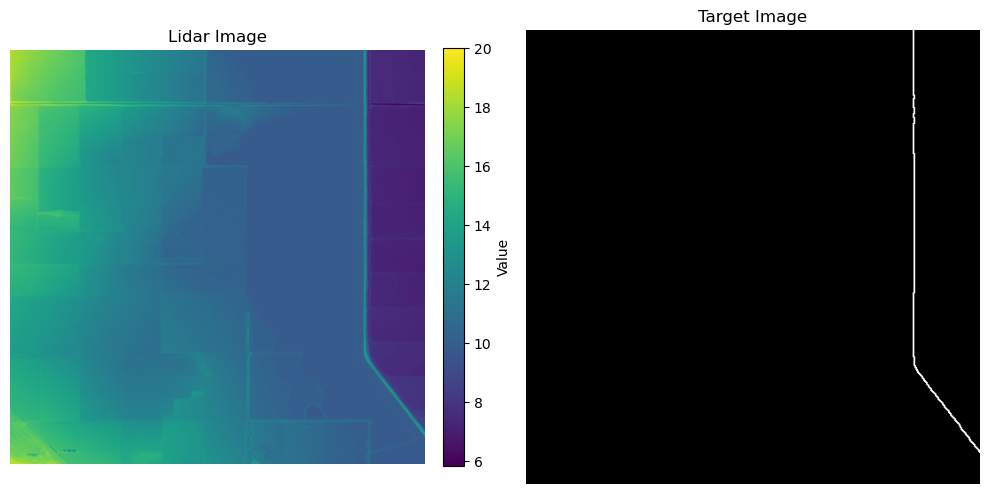

In [24]:
img_13_dataset_512.plot(0, figsize=(10, 10))
img_13_dataset_512.plot(1, figsize=(10, 10))
img_13_dataset_512.plot(19, figsize=(10, 10))
img_13_dataset_512.plot(20, figsize=(10, 10))

In [25]:
find_splits(Z=10812, s=256, max_overlap_frac=0.1)[:10]

[(43, 5, 10798),
 (44, 11, 10791),
 (46, 22, 10786),
 (45, 17, 10772),
 (43, 6, 10756),
 (42, 0, 10752),
 (44, 12, 10748),
 (46, 23, 10741),
 (45, 18, 10728),
 (43, 7, 10714)]

In [26]:
img_13_dataset_256 = SegmentationDataset(
    img_13_arr[:, :10791, :10791],
    img_13_target[:, :10791, :10791],
    transform=None,
    split=True,
    patch_size=256,
    final_size=256,
    overlap=11,
)

len(img_13_dataset_256)

1936

In [27]:
img_13_dataset_256.remove_empty(keep_empty=0.1)

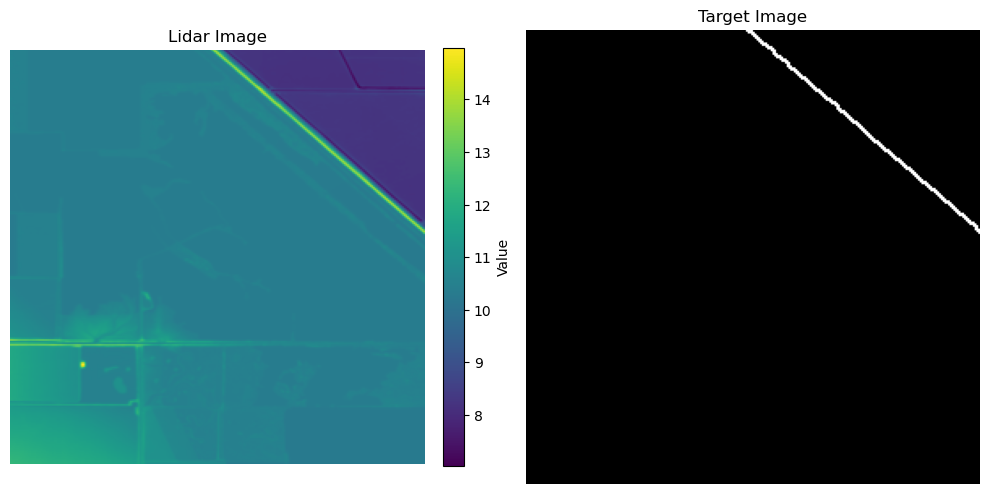

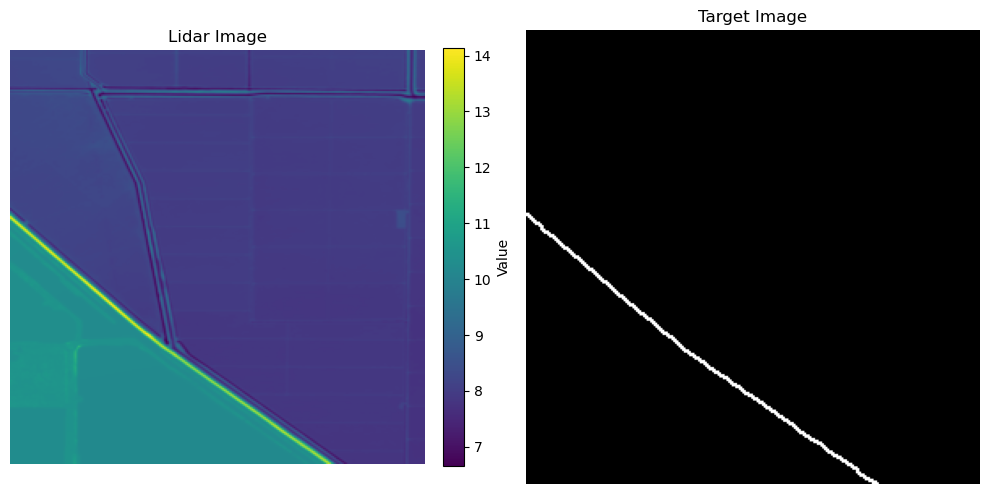

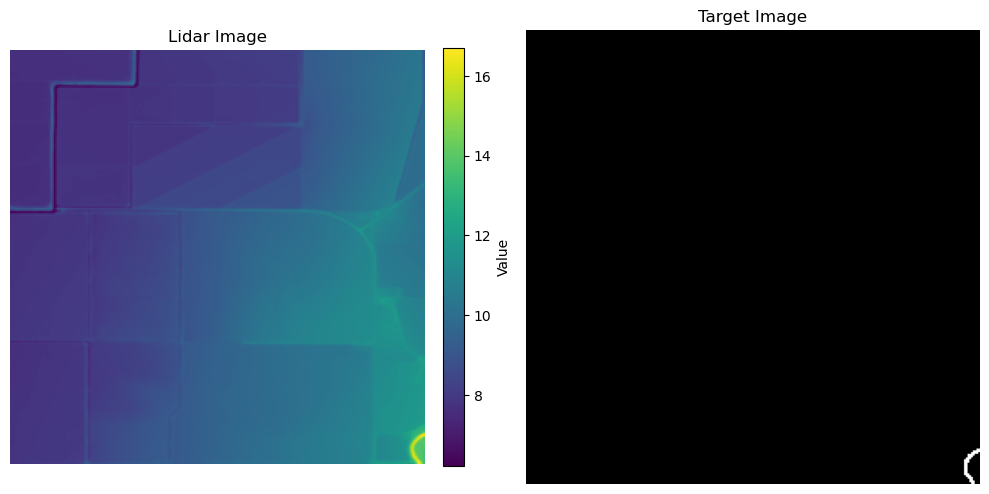

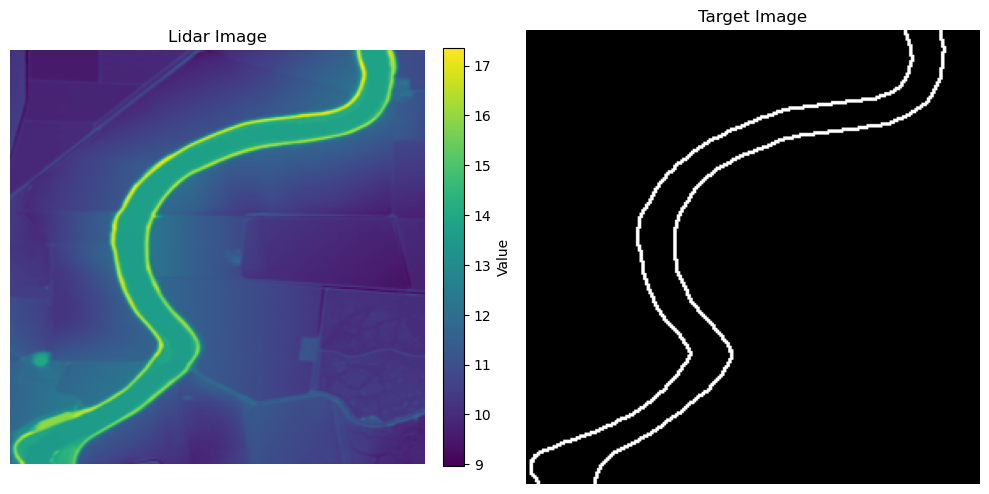

In [28]:
img_13_dataset_256.plot(0, figsize=(10, 10))
img_13_dataset_256.plot(1, figsize=(10, 10))
img_13_dataset_256.plot(19, figsize=(10, 10))
img_13_dataset_256.plot(20, figsize=(10, 10))

# 1m images

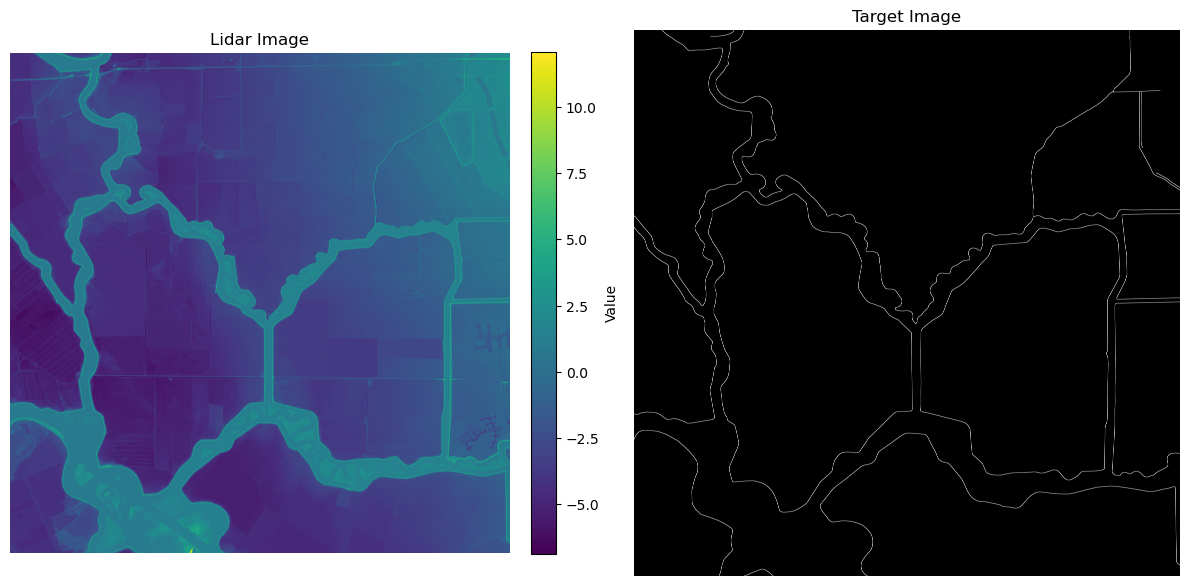

In [29]:
img_1m_arr, img_1m_target = get_mask(
    img_1m, levees_data_26910, invert=True, dilation_size=7
)

plot_img_and_target(img_1m_arr, img_1m_target)

In [30]:
img_1m_target = img_1m_target.reshape(1, 10012, 10012)
img_1m_arr.shape, img_1m_target.shape

((1, 10012, 10012), (1, 10012, 10012))

In [31]:
find_splits(Z=10012, s=512, max_overlap_frac=0.1)[:10]

[(20, 12, 10012),
 (21, 37, 10012),
 (20, 13, 9993),
 (21, 38, 9992),
 (20, 14, 9974),
 (21, 39, 9972),
 (20, 15, 9955),
 (21, 40, 9952),
 (20, 16, 9936),
 (21, 41, 9932)]

In [32]:
img_1m_dataset_512 = SegmentationDataset(
    img_1m_arr[:, :10012, :10012],
    img_1m_target[:, :10012, :10012],
    transform=None,
    split=True,
    patch_size=512,
    final_size=512,
    overlap=12,
)

len(img_1m_dataset_512)

400

In [33]:
img_1m_dataset_512.remove_empty(keep_empty=0.1)
len(img_1m_dataset_512)

184

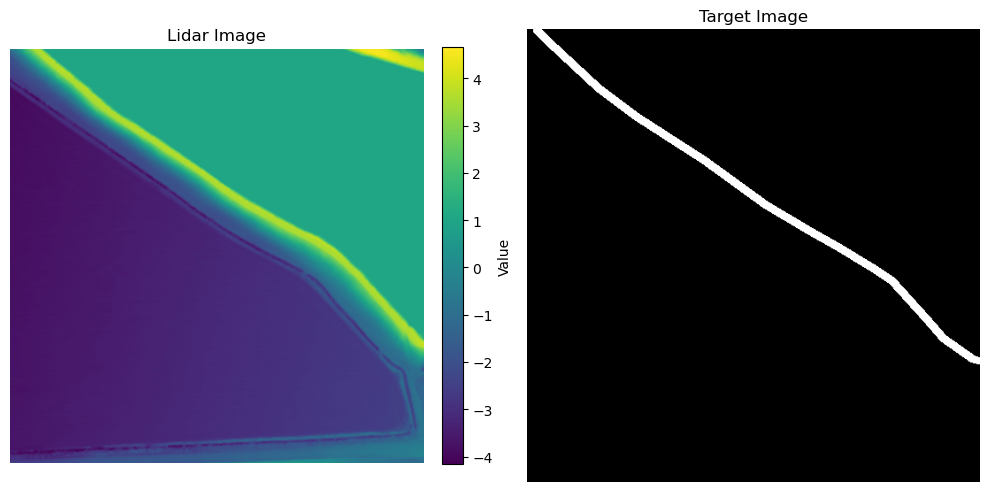

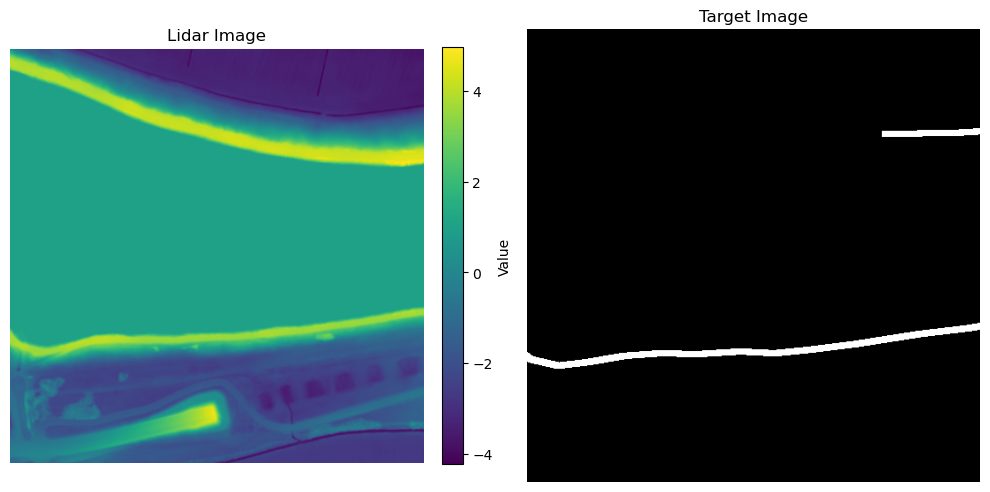

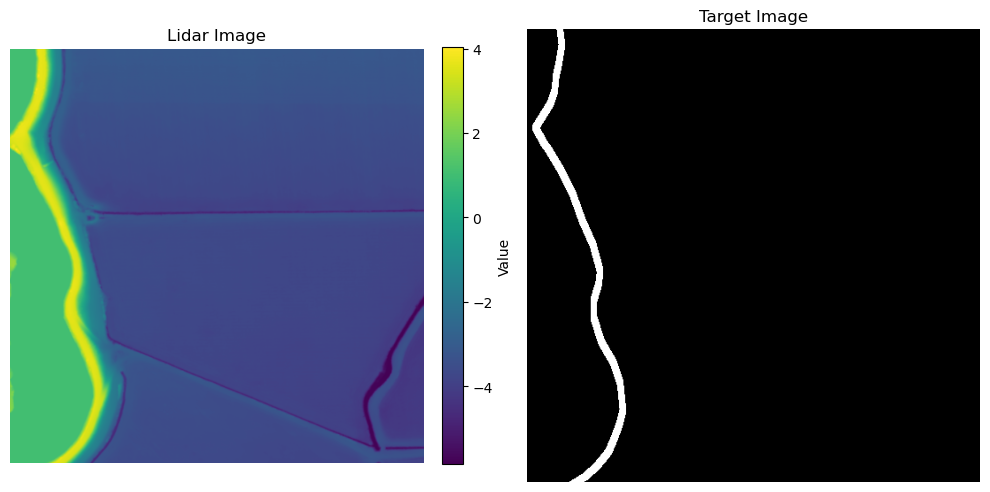

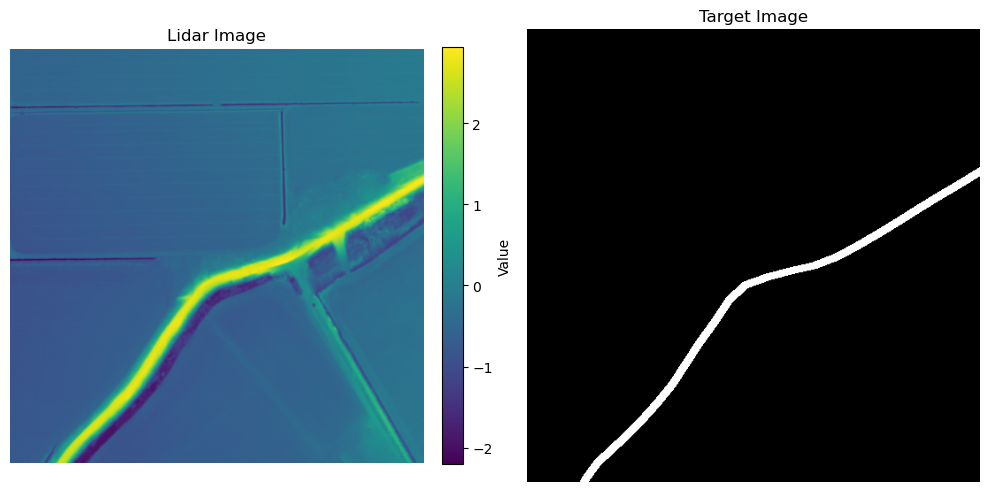

In [34]:
img_1m_dataset_512.plot(1, figsize=(10, 10))
img_1m_dataset_512.plot(2, figsize=(10, 10))
img_1m_dataset_512.plot(19, figsize=(10, 10))
img_1m_dataset_512.plot(20, figsize=(10, 10))

In [35]:
find_splits(Z=10012, s=256, max_overlap_frac=0.1)[:10]

[(40, 6, 10006),
 (43, 24, 10000),
 (39, 0, 9984),
 (41, 13, 9976),
 (42, 19, 9973),
 (40, 7, 9967),
 (43, 25, 9958),
 (39, 1, 9946),
 (41, 14, 9936),
 (42, 20, 9932)]

In [36]:
img_1m_dataset_256 = SegmentationDataset(
    img_1m_arr[:, :10000, :10000],
    img_1m_target[:, :10000, :10000],
    transform=None,
    split=True,
    patch_size=256,
    final_size=256,
    overlap=24,
)

len(img_1m_dataset_256)

1849

In [37]:
img_1m_dataset_256.remove_empty(keep_empty=0.1)
len(img_1m_dataset_256)

536

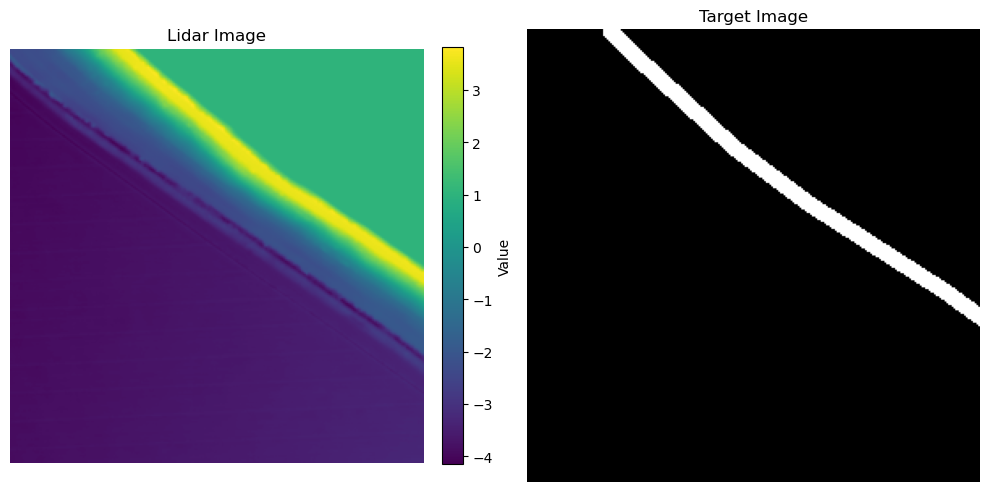

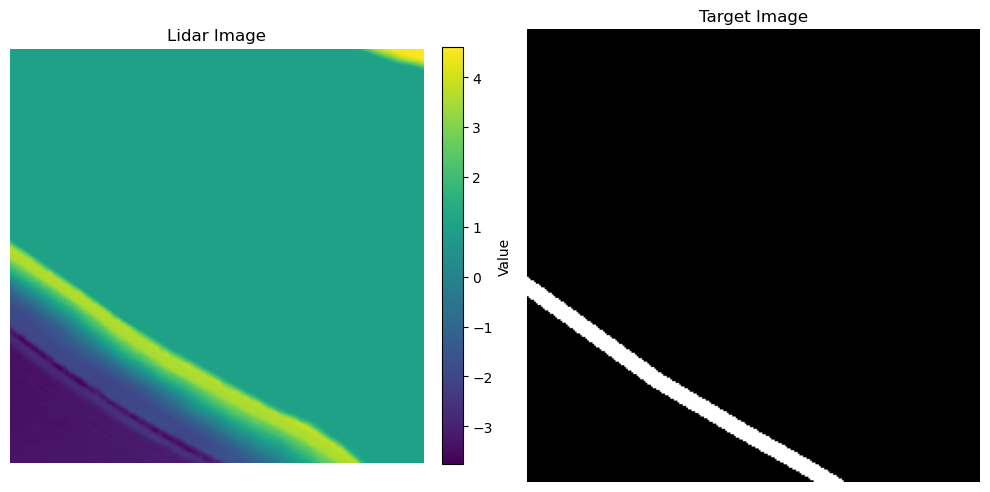

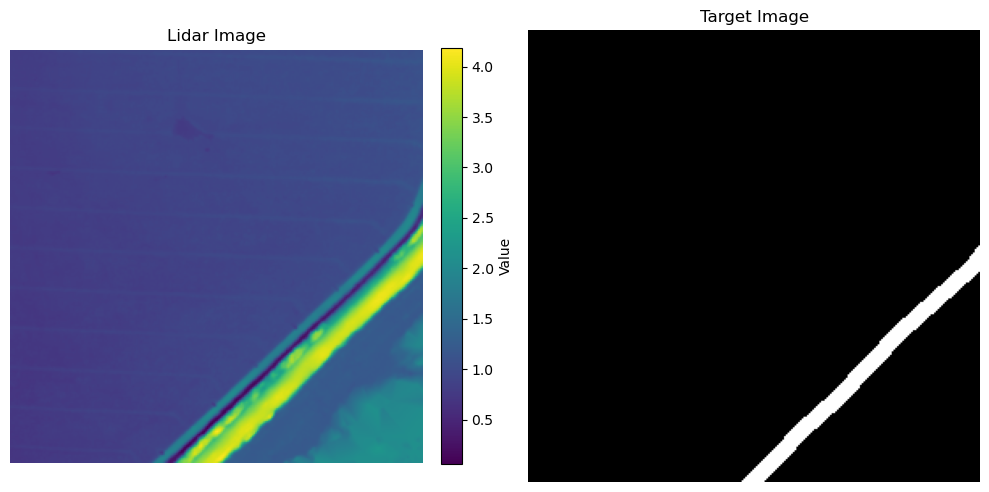

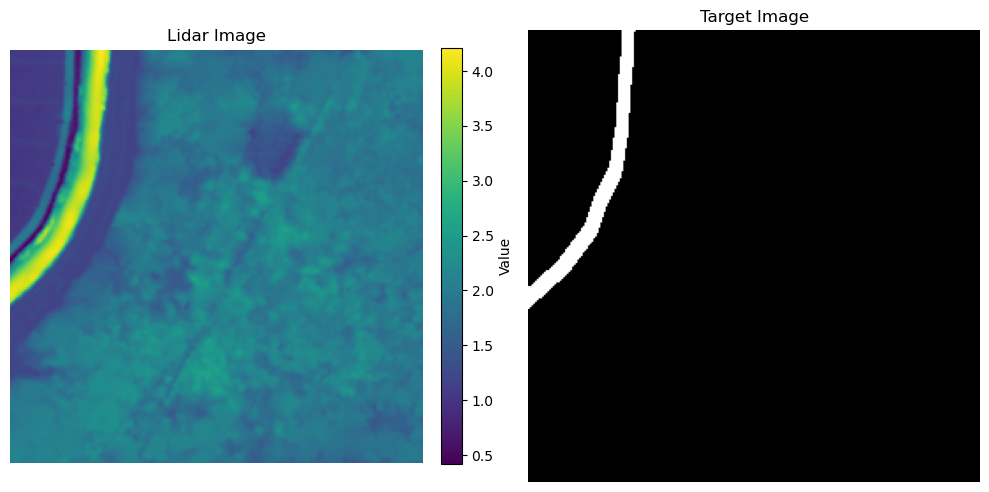

In [38]:
img_1m_dataset_256.plot(0, figsize=(10, 10))
img_1m_dataset_256.plot(1, figsize=(10, 10))
img_1m_dataset_256.plot(19, figsize=(10, 10))
img_1m_dataset_256.plot(20, figsize=(10, 10))